In [101]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
final = pd.read_csv('final data.csv')

In [102]:
final.head()

,STATE,Year,CO2,CH4,N2O,Fluorinated GHG,Incentives,Laws and Regulations,State Incentives,Utility/Private Incentives,Programs,State Hybrid Incentives,Ozone
0,AL,2012,84138381,701702,602778,264437,0.0,3.0,7.0,4.0,0.0,0.0,0.044215
1,AL,2013,83297945,594388,451420,274194,0.0,3.0,7.0,4.0,0.0,0.0,0.039733
2,AL,2014,84847355,634009,525399,312201,0.0,3.0,7.0,4.0,0.0,0.0,0.040936
3,AL,2015,82143007,611595,462661,263031,0.0,3.0,7.0,3.0,0.0,0.0,0.039063
4,AL,2016,75103394,550119,528136,302584,0.0,3.0,6.0,2.0,0.0,0.0,0.042845


In [103]:
final.info()
modified_final = pd.DataFrame(columns=['avgCO2','avgCH4','avgN2O','avgOzone'])
modified_final = final.groupby('STATE')['CO2','CH4','N2O','Ozone'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE                       336 non-null    object 
 1   Year                        357 non-null    int64  
 2   CO2                         357 non-null    int64  
 3   CH4                         357 non-null    int64  
 4   N2O                         357 non-null    int64  
 5   Fluorinated GHG             245 non-null    object 
 6   Incentives                  336 non-null    float64
 7   Laws and Regulations        336 non-null    float64
 8   State Incentives            336 non-null    float64
 9   Utility/Private Incentives  336 non-null    float64
 10  Programs                    336 non-null    float64
 11  State Hybrid Incentives     336 non-null    float64
 12  Ozone                       336 non-null    float64
dtypes: float64(7), int64(4), object(2)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
modified_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, AK to WY
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     47 non-null     float64
 1   CH4     47 non-null     float64
 2   N2O     47 non-null     float64
 3   Ozone   47 non-null     float64
dtypes: float64(4)
memory usage: 1.8+ KB


In [105]:
modified_final.head()

,CO2,CH4,N2O,Ozone
STATE,,,,
AK,1.497560e+07,1.990749e+05,14618.714286,0.027972
AL,7.890785e+07,6.005120e+05,479080.857143,0.040935
AR,3.934708e+07,2.800404e+05,560996.571429,0.041204
AZ,5.410111e+07,2.424970e+05,584756.142857,0.048495
CA,9.227830e+07,1.910732e+06,128908.285714,0.044069


In [106]:
final.isnull().sum(axis = 0)

STATE                          21
Year                            0
CO2                             0
CH4                             0
N2O                             0
Fluorinated GHG               112
Incentives                     21
Laws and Regulations           21
State Incentives               21
Utility/Private Incentives     21
Programs                       21
State Hybrid Incentives        21
Ozone                          21
dtype: int64

In [107]:
mean = final['Ozone'].mean()
final['Ozone'] = final['Ozone'].fillna(mean)

In [108]:
final.isnull().sum(axis = 0)

STATE                          21
Year                            0
CO2                             0
CH4                             0
N2O                             0
Fluorinated GHG               112
Incentives                     21
Laws and Regulations           21
State Incentives               21
Utility/Private Incentives     21
Programs                       21
State Hybrid Incentives        21
Ozone                           0
dtype: int64

In [109]:
final.pivot_table(index=['Ozone'], aggfunc='size')

Ozone
0.025783    1
0.026813    1
0.027041    1
0.027240    1
0.027371    1
           ..
0.052429    1
0.053415    1
0.054178    1
0.056174    1
0.057066    1
Length: 330, dtype: int64

In [110]:
final.pivot_table(index=['N2O'], aggfunc='size')

N2O
21          2
22          1
76          2
124         1
147         1
           ..
4994554     1
5739976     1
7524030     1
7748239     1
10807191    1
Length: 347, dtype: int64

In [111]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE                       336 non-null    object 
 1   Year                        357 non-null    int64  
 2   CO2                         357 non-null    int64  
 3   CH4                         357 non-null    int64  
 4   N2O                         357 non-null    int64  
 5   Fluorinated GHG             245 non-null    object 
 6   Incentives                  336 non-null    float64
 7   Laws and Regulations        336 non-null    float64
 8   State Incentives            336 non-null    float64
 9   Utility/Private Incentives  336 non-null    float64
 10  Programs                    336 non-null    float64
 11  State Hybrid Incentives     336 non-null    float64
 12  Ozone                       357 non-null    float64
dtypes: float64(7), int64(4), object(2)


In [112]:
sum(final.duplicated())

0

In [113]:
model = KMeans(n_clusters=3)
model.fit(final[['CO2','Ozone']]) 

KMeans(n_clusters=3)

In [114]:
labels = model.predict(final[['CO2','Ozone']])

In [115]:
print(labels)

[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0]


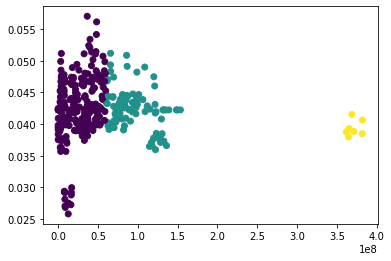

In [116]:
xs = final['CO2'] 
ys = final['Ozone']
plt.scatter(xs, ys, c=labels)
plt.show()

In [117]:
model1 = KMeans(n_clusters=3)
model1.fit(modified_final[['CO2','Ozone','CH4','N2O']]) 
labels1 = model1.predict(modified_final[['CO2','Ozone','CH4','N2O']])
modified_final['clusters'] = labels1
print(labels1)

[0 2 0 0 2 0 0 0 2 2 0 0 0 2 0 2 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0
 0 0 0 1 0 0 0 0 2 2]


In [118]:
modified_final.head()

,CO2,CH4,N2O,Ozone,clusters
STATE,,,,,
AK,1.497560e+07,1.990749e+05,14618.714286,0.027972,0
AL,7.890785e+07,6.005120e+05,479080.857143,0.040935,2
AR,3.934708e+07,2.800404e+05,560996.571429,0.041204,0
AZ,5.410111e+07,2.424970e+05,584756.142857,0.048495,0
CA,9.227830e+07,1.910732e+06,128908.285714,0.044069,2


In [119]:
import seaborn as sns
reduced_data = PCA(n_components=3).fit_transform(modified_final)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])
results.head()


,pca1,pca2,pca3
0,-3.673364e+07,-5.942271e+05,10190.159393
1,2.719635e+07,-1.406992e+06,77944.876563
2,-1.236072e+07,-8.672175e+05,410490.381094
3,2.389525e+06,-1.203392e+06,383541.057798
4,4.058491e+07,-5.306630e+05,-688084.120533


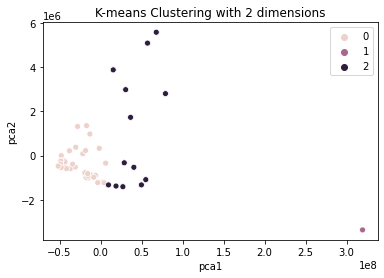

In [120]:
sns.scatterplot(x="pca1", y="pca2", hue=labels1, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

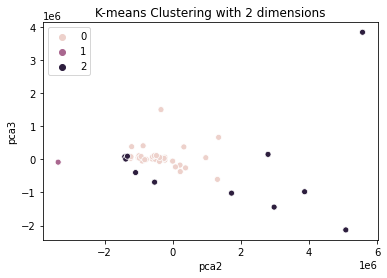

In [121]:
sns.scatterplot(x="pca2", y="pca3", hue=labels1, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()